In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# load the dataset

In [9]:
df = pd.read_csv('titanic.csv')
df.head()
#print(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df = sns.load_dataset('titanic')

# data preprocessing

In [12]:
# Drop unnecessary columns
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)

# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Convert categorical columns to numeric
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Drop rows with any remaining nulls
df = df.dropna()

# Check the dataset
print(df.head())


   survived  pclass   age  sibsp  parch     fare  alone  sex_male  embarked_Q  \
0         0       3  22.0      1      0   7.2500  False      True       False   
1         1       1  38.0      1      0  71.2833  False     False       False   
2         1       3  26.0      0      0   7.9250   True     False       False   
3         1       1  35.0      1      0  53.1000  False     False       False   
4         0       3  35.0      0      0   8.0500   True      True       False   

   embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


C:\Users\gutha\AppData\Local\Temp\ipykernel_25056\2845309243.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\gutha\AppData\Local\Temp\ipykernel_25056\2845309243.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

# train-test Split

In [16]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X)
print(y)

     pclass   age  sibsp  parch     fare  alone  sex_male  embarked_Q  \
0         3  22.0      1      0   7.2500  False      True       False   
1         1  38.0      1      0  71.2833  False     False       False   
2         3  26.0      0      0   7.9250   True     False       False   
3         1  35.0      1      0  53.1000  False     False       False   
4         3  35.0      0      0   8.0500   True      True       False   
..      ...   ...    ...    ...      ...    ...       ...         ...   
886       2  27.0      0      0  13.0000   True      True       False   
887       1  19.0      0      0  30.0000   True     False       False   
888       3  28.0      1      2  23.4500  False     False       False   
889       1  26.0      0      0  30.0000   True      True       False   
890       3  32.0      0      0   7.7500   True      True        True   

     embarked_S  
0          True  
1         False  
2          True  
3          True  
4          True  
..          ...

# train the model

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(model)

RandomForestClassifier(random_state=42)


# evaluate the model

In [18]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



# Visualization: Survivors vs non-survivors

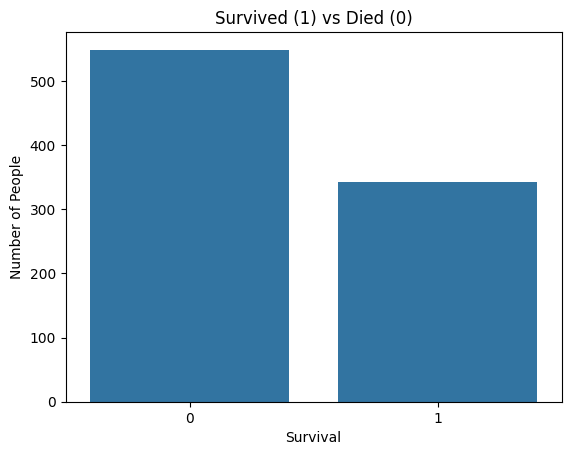

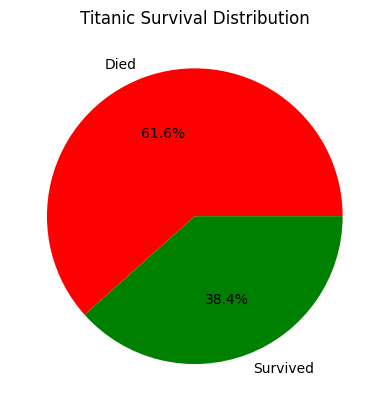

In [19]:
# Count plot of survivors
sns.countplot(x='survived', data=df)
plt.title("Survived (1) vs Died (0)")
plt.xlabel("Survival")
plt.ylabel("Number of People")
plt.show()

# Optional: Show percentages
survival_counts = df['survived'].value_counts()
labels = ['Died', 'Survived']
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title("Titanic Survival Distribution")
plt.show()
